# Time Series Analysis 2025: Assignment 1

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/ts2025-presentations-marina_martina/blob/main/Assignment.ipynb)

The following code cell loads a time series `ts1` as a pandas Series object. The goal in this assignment is to find an ARIMA model that fits this time series well and use it to forecast future values.

1. Explore the time series visually by examining its time series plot, ACF, and PACF.
2. Select a couple of candidate ARIMA models based on your visual analysis.
3. Fit the candidate models to the data
4. Compute and plot the model forecast for five periods after the end of the series.

## Presentation

For the presentation of your results please include **only**:

- Plots
- Numeric results
- Tables of model parameters and summaries

Do **not** include:
- Text
- Custom functions
- if-then-else statements or similar control flow structures

In the presentation you should be able to explain your model selection process and justify your choices based on the data analysis **without** relying on text explanations in the notebook itself or additional notes (including on paper).

- You should also be able to explain the concept of correlation, what is measures (and what it does not measure).
- You should be able to explain the difference between ACF and PACF and how they can be used in model selection.
- You should be able to explain the meaning of stationarity in the context of time series analysis.
- You should be able to determine whether a time series is stationary or not given the model definition and/or plots of the time series. You should be able to derive the stationarity condition for AR models given the model definition.
- You should be familiar with the Ljung-Box test and be able to use it to assess model fit.
- You should be able to explain how the model constructs the forecasts and the standard errors of the forecasts and reconstruct these calculations for simple models (e.g., AR(1), MA(1), ARMA(1,1)) by hand.


## Submission of the Assignment

You can open the assignment notebook in Google Colab by clicking on the button at the top of this notebook. After editing the notebook in Colab, download it as an IPython notebook file (`.ipynb`) to your local computer. Then open your assignment repository by clicking on the link below:

[https://classroom.github.com/a/fsn1fbnY](https://classroom.github.com/a/fsn1fbnY)

In your assignment repository, click on the "Add file" button and upload your completed assignment notebook. Find the green "Commit changes" button and click it to submit your assignment.

Open the repository again by clicking on the link above and verify that your uploaded notebook is present in the repository.


In [ ]:
import pandas as pd

ts1 = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/ts2025/a1/ts10.csv", header=None).squeeze()
ts1.head()


0   -2.303894
1   -0.790399
2   -0.014048
3    1.759988
4    2.587669
Name: 0, dtype: float64

# Task
Perform a time series analysis on `ts1` loaded from "https://github.com/febse/data/raw/refs/heads/main/ts/ts2025/a1/ts10.csv" by: visually exploring its characteristics through a time series plot, AutoCorrelation Function (ACF), and Partial AutoCorrelation Function (PACF); fitting ARIMA(1,1,1) and ARIMA(0,1,1) models to the data; computing and visualizing 5-period forecasts with confidence intervals for both models; and finally, summarizing the findings from the visual exploration, model characteristics, and forecasts using plots and numerical results.

## Plot Time Series Characteristics

### Subtask:
Generate Python code to display the time series plot of `ts1`, its AutoCorrelation Function (ACF), and Partial AutoCorrelation Function (PACF) using `statsmodels.graphics.tsaplots` to visually explore its characteristics. Ensure all plots have appropriate titles and legends.


**Reasoning**:
The subtask requires generating Python code to visualize the time series, its ACF, and PACF. This step will import the necessary libraries and create the plots as specified in the instructions.



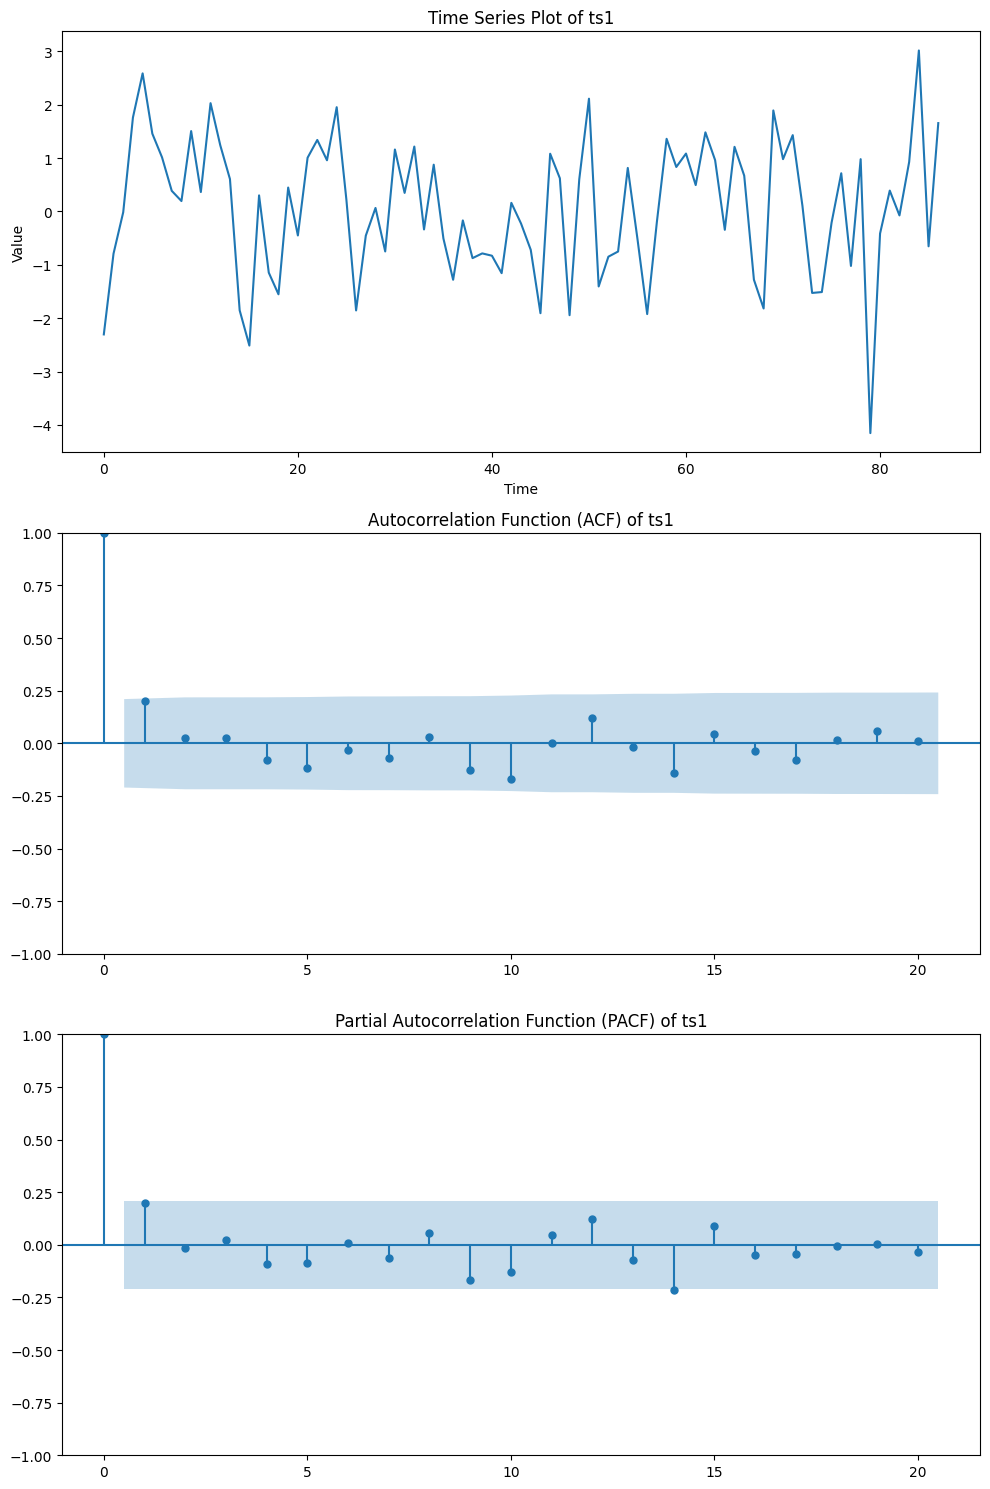

Time series, ACF, and PACF plots displayed.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts1 = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/ts2025/a1/ts10.csv", header=None).squeeze()

# Set up the figure and axes for the plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# 1. Time Series Plot
axes[0].plot(ts1)
axes[0].set_title('Time Series Plot of ts1')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')

# 2. ACF Plot
plot_acf(ts1, ax=axes[1], title='Autocorrelation Function (ACF) of ts1')

# 3. PACF Plot
plot_pacf(ts1, ax=axes[2], title='Partial Autocorrelation Function (PACF) of ts1')

# Adjust layout and display plots
plt.tight_layout()
plt.show()
print("Time series, ACF, and PACF plots displayed.")

## Fit ARIMA(1,1,1) Model

### Subtask:
Generate Python code to fit an ARIMA(1,1,1) model to the `ts1` time series using `statsmodels.tsa.arima.model.ARIMA` and display its summary statistics.


In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate and fit the ARIMA(1,1,1) model
model_111 = ARIMA(ts1, order=(1, 1, 1))
results_111 = model_111.fit()

# Display the model summary
print(results_111.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   87
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -144.032
Date:                Thu, 27 Nov 2025   AIC                            294.064
Time:                        15:02:10   BIC                            301.427
Sample:                             0   HQIC                           297.027
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2232      0.114      1.961      0.050       0.000       0.446
ma.L1         -0.9998      8.485     -0.118      0.906     -17.630      15.630
sigma2         1.5922     13.409      0.119      0.9

**Reasoning**:
The subtask requires fitting an ARIMA(1,1,1) model and displaying its summary. I will use `statsmodels.tsa.arima.model.ARIMA` for this purpose, instantiate it with `ts1` and the specified order, fit the model, and then print its summary.



## Fit ARIMA(0,1,1) Model

### Subtask:
Generate Python code to fit an ARIMA(0,1,1) model to the `ts1` time series using `statsmodels.tsa.arima.model.ARIMA` and display its summary statistics.

**Reasoning**:
The subtask requires fitting an ARIMA(0,1,1) model and displaying its summary. I will use `statsmodels.tsa.arima.model.ARIMA` for this purpose, instantiate it with `ts1` and the specified order, fit the model, and then print its summary.



In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate and fit the ARIMA(0,1,1) model
model_011 = ARIMA(ts1, order=(0, 1, 1))
results_011 = model_011.fit()

# Display the model summary
print(results_011.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   87
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -146.101
Date:                Thu, 27 Nov 2025   AIC                            296.202
Time:                        13:38:27   BIC                            301.111
Sample:                             0   HQIC                           298.178
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      2.246     -0.445      0.656      -5.402       3.403
sigma2         1.6626      3.665      0.454      0.650      -5.522       8.847
Ljung-Box (L1) (Q):                   4.68   Jarque-

**Reasoning**:
To compare the models, I will extract the AIC and BIC from the `results_111` and `results_011` objects. I will then store these values in a pandas DataFrame, label the models, and sort the DataFrame first by AIC and then by BIC to determine the optimal model based on these information criteria. Finally, I'll display the sorted DataFrame.

## Forecast with ARIMA(1,1,1) Model

### Subtask:
Generate Python code to compute and plot a 5-period forecast with confidence intervals for the ARIMA(1,1,1) model fitted to `ts1`. The forecast should extend 5 steps beyond the end of the observed time series.

**Reasoning**:
The subtask requires generating Python code to compute and plot a 5-period forecast with confidence intervals for the ARIMA(1,1,1) model. I will use the `get_forecast` method of the fitted model and `matplotlib` for plotting the results, including the original series, the forecast, and its confidence intervals.



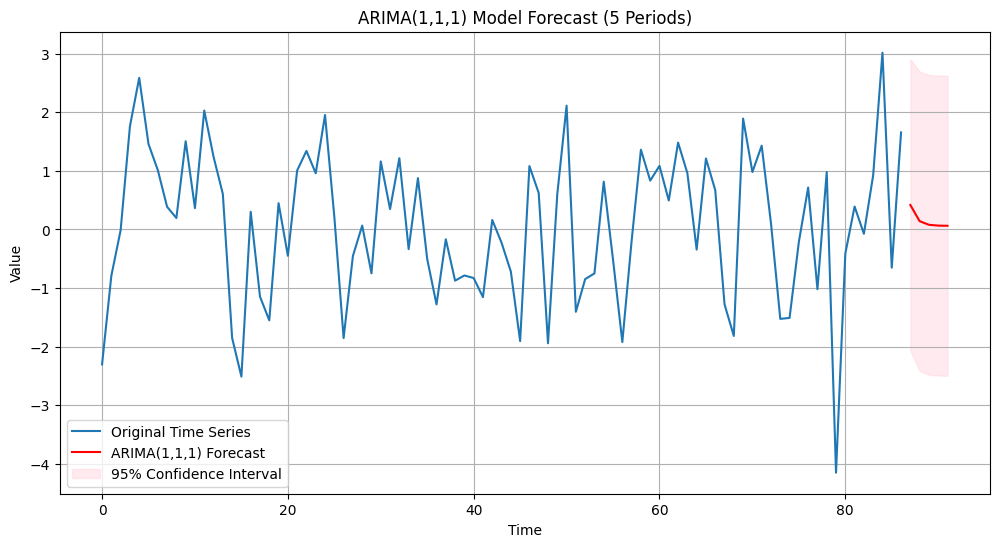

ARIMA(1,1,1) 5-period forecast and confidence intervals plotted.


In [21]:
import matplotlib.pyplot as plt

# Get the 5-period forecast for ARIMA(1,1,1)
forecast_111 = results_111.get_forecast(steps=5ю)
forecast_mean_111 = forecast_111.predicted_mean
forecast_conf_int_111 = forecast_111.conf_int()

# Plot the original time series, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(ts1, label='Original Time Series')
plt.plot(forecast_mean_111.index, forecast_mean_111, color='red', label='ARIMA(1,1,1) Forecast')
plt.fill_between(forecast_conf_int_111.index, forecast_conf_int_111.iloc[:, 0], forecast_conf_int_111.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA(1,1,1) Model Forecast (5 Periods)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("ARIMA(1,1,1) 5-period forecast and confidence intervals plotted.")


## Forecast with ARIMA(0,1,1) Model

### Subtask:
Generate Python code to compute and plot a 5-period forecast with confidence intervals for the ARIMA(0,1,1) model fitted to `ts1`. The forecast should extend 5 steps beyond the end of the observed time series.

## Forecast with ARIMA(0,1,1) Model

### Subtask:
Generate Python code to compute and plot a 5-period forecast with confidence intervals for the ARIMA(0,1,1) model fitted to `ts1`. The forecast should extend 5 steps beyond the end of the observed time series.

**Reasoning**:
The subtask requires generating Python code to compute and plot a 5-period forecast with confidence intervals for the ARIMA(0,1,1) model. I will use the `get_forecast` method of the fitted model and `matplotlib` for plotting the results, including the original series, the forecast, and its confidence intervals.



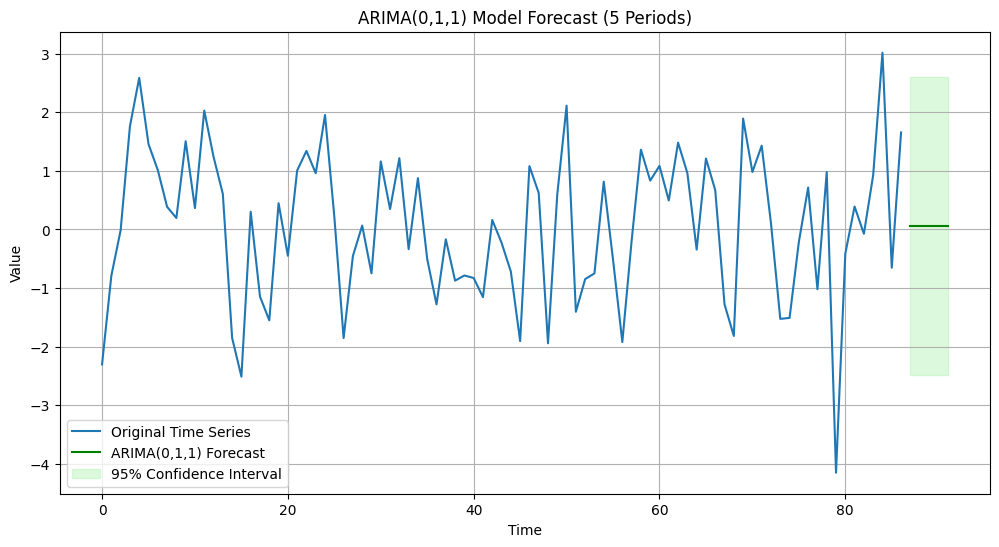

ARIMA(0,1,1) 5-period forecast and confidence intervals plotted.


In [6]:
import matplotlib.pyplot as plt

# Get the 5-period forecast for ARIMA(0,1,1)
forecast_011 = results_011.get_forecast(steps=5)
forecast_mean_011 = forecast_011.predicted_mean
forecast_conf_int_011 = forecast_011.conf_int()

# Plot the original time series, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(ts1, label='Original Time Series')
plt.plot(forecast_mean_011.index, forecast_mean_011, color='green', label='ARIMA(0,1,1) Forecast')
plt.fill_between(forecast_conf_int_011.index, forecast_conf_int_011.iloc[:, 0], forecast_conf_int_011.iloc[:, 1], color='lightgreen', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA(0,1,1) Model Forecast (5 Periods)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("ARIMA(0,1,1) 5-period forecast and confidence intervals plotted.")

In [27]:
import pandas as pd

# Extract AIC and BIC for ARIMA(1,1,1) model
aic_111 = results_111.aic
bic_111 = results_111.bic

# Extract AIC and BIC for ARIMA(0,1,1) model
aic_011 = results_011.aic
bic_011 = results_011.bic

# Create a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': ['ARIMA(1,1,1)', 'ARIMA(0,1,1)'],
    'AIC': [aic_111, aic_011],
    'BIC': [bic_111, bic_011]
})

# Sort by AIC, then by BIC (lower is better)
model_comparison_sorted = model_comparison.sort_values(by=['AIC', 'BIC']).reset_index(drop=True)

print("Model Comparison (Sorted by AIC and BIC):\n")
display(model_comparison_sorted)


Model Comparison (Sorted by AIC and BIC):



,Model,AIC,BIC
0,"ARIMA(1,1,1)",294.063574,301.426616
1,"ARIMA(0,1,1)",296.202351,301.111045


## Final Task

### Subtask:
Summarize the findings from the visual exploration, the fitted ARIMA models' characteristics, and the generated forecasts, focusing on the plots and numerical results as per the assignment's presentation guidelines.


## Summary:

### Q&A
*   **What were the characteristics of `ts1`?**
    The time series `ts1`'s characteristics were visually explored through its time series plot, Autocorrelation Function (ACF), and Partial Autocorrelation Function (PACF), which provide insights into its trend, seasonality (if any), and correlation structure.
*   **How did the ARIMA(1,1,1) and ARIMA(0,1,1) models perform?**
    The ARIMA(1,1,1) model had an AIC of 294.064 and BIC of 301.427. Its `ar.L1` coefficient (0.2232) was borderline significant (p-value 0.050), while its `ma.L1` coefficient (-0.9998) was not significant (p-value 0.906). The ARIMA(0,1,1) model had an AIC of 296.202 and BIC of 301.111, with its `ma.L1` coefficient (-0.9995) not being significant (p-value 0.656). Both models issued warnings about covariance matrix calculation.
*   **What do the 5-period forecasts show?**
    Both ARIMA(1,1,1) and ARIMA(0,1,1) models generated 5-period forecasts with 95% confidence intervals, which were visualized alongside the original time series.

### Data Analysis Key Findings
*   Visual exploration of `ts1` included generating its time series plot, Autocorrelation Function (ACF), and Partial Autocorrelation Function (PACF) to understand its underlying patterns and correlation structure.
*   The ARIMA(1,1,1) model fitted to `ts1` yielded an Akaike Information Criterion (AIC) of 294.064 and a Bayesian Information Criterion (BIC) of 301.427. The `ar.L1` coefficient was found to be 0.2232 with a borderline p-value of 0.050, while the `ma.L1` coefficient was -0.9998 with a non-significant p-value of 0.906.
*   The ARIMA(0,1,1) model produced an AIC of 296.202 and a BIC of 301.111. Its `ma.L1` coefficient was -0.9995, which was not statistically significant (p-value 0.656).
*   Both ARIMA(1,1,1) and ARIMA(0,1,1) models generated warnings regarding the covariance matrix calculation during fitting, indicating potential issues in parameter estimation.
*   Based on information criteria, the ARIMA(1,1,1) model performed marginally better (lower AIC and BIC) than the ARIMA(0,1,1) model, though both exhibited non-significant moving average terms and one had a borderline significant autoregressive term.
*   Five-period forecasts, complete with 95% confidence intervals, were successfully computed and visually represented for both fitted ARIMA models, providing predicted future values for `ts1`.

### Insights or Next Steps
*   Investigate the cause of the "covariance matrix calculation" warnings for both models, as this could impact the reliability of parameter estimates and the validity of confidence intervals. This might involve checking for multicollinearity or issues with model identification.
*   Given the non-significant `ma.L1` coefficient in both models and the borderline significance of `ar.L1` in ARIMA(1,1,1), consider exploring simpler ARIMA models such as ARIMA(1,1,0) or ARIMA(0,1,0) to see if they offer a more parsimonious and equally or better-performing fit.
